In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 3-3 최적화 알고리즘

## 0. 데이터셋 소개

### Wild blueberry

[Wild blueberry](https://data.mendeley.com/datasets/p5hvjzsvn8/1) 야생 블루베리의 수확량을 시뮬레이션한 데이터셋입니다.


|Features|Unit|Description|
|:--------|:----|:-----------|
|Row#||Index|
|clonesize|m2|The average blueberry clone size in the field|
|honeybee|bees/m2/min|Honeybee density in the field|
|bumbles|bees/m2/min|Bumblebee density in the field|
|andrena|bees/m2/min|Andrena bee density in the field|
|osmia|bees/m2/min|Osmia bee density in the field|
|MaxOfUpperTRange|℃|The highest record of the upper band daily air temperature during the bloom season|
|MinOfUpperTRange|℃|The lowest record of the upper band daily air temperature|
|AverageOfUpperTRange|℃|The average of the upper band daily air temperature|
|MaxOfLowerTRange|℃|The highest record of the lower band daily air temperature|
|MinOfLowerTRange|℃|The lowest record of the lower band daily air temperature|
|AverageOfLowerTRange|℃|The average of the lower band daily air temperature|
|RainingDays|Day|The total number of days during the bloom season, each of which has precipitation larger than zero|
|AverageRainingDays|Day|The average of raining days of the entire bloom season|
|fruitset||The amount of fruit per tree|
|fruitmass||The mass of a fruit|
|seeds||The mass of a seed|
|yield||The amount of yield|


In [2]:
df_berry = pd.read_csv('data/wild_blueberry.csv', index_col='Row#')
df_berry.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


## 1. 경사 하강법(Gradient Descent)

**아이디어**

> 목적 함수의 최적값을 찾기 위해 목적 함수에 대한 파라메터(Parameter)의 경사(Gradient)을 이용합니다.

> 목적 함수의 최적값의 방향으로 파라메터(Parameter)를 경사도에 따라 이동시킵니다.

> 경사도를 구하고 이동을 반복하여 파라메터의 최적점을 도출합니다.

### 알고리즘

1. 파라메터($\hat{\beta}$) 초기화


2. 파라메터 경사도($\frac{\partial{L}}{\partial{\hat{\beta}}}$) 계산, L: 손실, 목적함수


3. 파라메터 업데이트

> $\hat{\beta} = \hat{\beta} - \text{Learning rating} × \frac{\partial{L}}{\partial{\hat{\beta}}}$, 

> Learning rating : 경사도 반영율

4. 종료 조건 미충족 시 2번 부터 반복

> 종료 조건: 업데이트 반복횟수(epochs), 성능 개선 정도, ...

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
  
$y = X + 5 + e, e \sim N(0, 1)$
    
관계를 지닌 데이터 포인트 100개를 만듭니다.
    
경사하강법의 동작 원리를 파악하기 위해, 기울기와 절편을 경사 하강법을 이용한 선형 회귀 모델 학습합니다.

여기서, 회귀 모델의 손실 함수(Loss Function)를 평균제곱오차(Mean Squared Error)를 이용하여

회귀 계수와 손실 함수 경사도를 구합니다.

$L = \frac{1}{n}\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2 $

> $\hat{y} = X\hat{\beta},  r = y - \hat{y}$

$\frac{dL}{d\hat{\beta}} =  -\frac{2}{n}X^Tr$
    
</div>

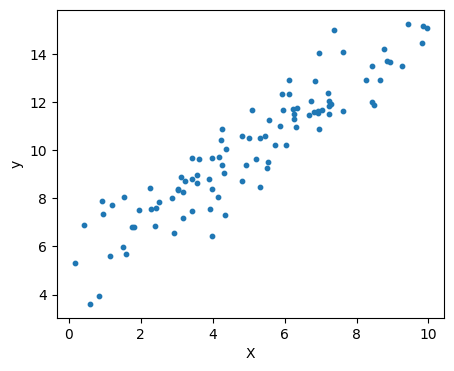

In [3]:
# 단순 선형 회귀 데이터셋을 만듭니다.

beta_1, beta_0 = 1, 5 # 종속변수 (y) 독립변수(X) 간의 기울기와 절편입니다.
# 동일한 실행 결과를 얻게하기 위해 랜덤 시드값을 고정시킵니다.
np.random.seed(123)
# 기울기는 beta_1, 절편은 beta_0이고 오차가 표준정규분포인 임의의 100개의 데이터 포인트를 생성합니다.
X = np.random.random(size=100) * 10
y = X * beta_1 + beta_0 + np.random.normal(size=100)
plt.figure(figsize=(5, 4))
plt.scatter(X, y, s=10)
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('y')
plt.show()

In [4]:
# 회귀 모델의 절편을 따로 구하지 않고, 회귀 계수와 같이 구할 수 있도록 상수항을 추가합니다.
X_add_const = np.vstack([np.ones_like(X), X]).T
X_add_const[:5]

array([[1.        , 6.96469186],
       [1.        , 2.86139335],
       [1.        , 2.26851454],
       [1.        , 5.51314769],
       [1.        , 7.1946897 ]])

In [5]:
# 파라메터를 초기화 합니다.
beta_hat = np.random.uniform(-1, 1, size=2)
beta_hat

array([ 0.69106599, -0.6261925 ])

경사도를 구하는 부분만 가져옵니다.

$L = \frac{1}{n}\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2 $

> $\hat{y} = X\hat{\beta},  r = y - \hat{y}$

$\frac{dL}{d\hat{\beta}} =  -\frac{2}{n}X^Tr$

In [6]:
epochs = 500 # 파라메터 업데이트 루틴의 반복 횟수입니다.
learning_rate = 0.01 # 파라메터 업데이트 비율입니다. 
n = X_add_const.shape[0]
losses = list()
beta_hats = list()
for i in range(epochs):
    residuals = y - np.dot(X_add_const, beta_hat)
    losses.append(np.mean(residuals ** 2))
    # 100 epoch 마다 모수를 기록합니다.
    if i % 100 == 0:
        beta_hats.append(beta_hat.copy())
    beta_hat_grad = -2 * np.dot(X_add_const.T, residuals) / n
    beta_hat -= beta_hat_grad * learning_rate
# 최종 모수를 남깁니다.
beta_hats.append(beta_hat.copy())

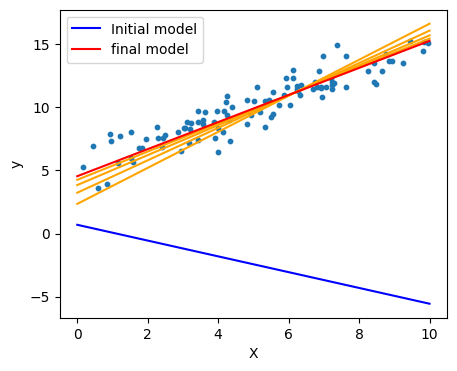

In [7]:
# 경사하강법의 진행됨에 따라 모델을 시각화 해봅니다.
plt.figure(figsize=(5, 4))
plt.scatter(X, y, s=10)
beta_hat = beta_hats[0]
plt.plot((0, 10), (beta_hat.dot([1, 0]), beta_hat.dot([1, 10])), c='blue', label='Initial model')
for beta_hat in beta_hats[1:-1]:
    plt.plot((0, 10), (beta_hat.dot([1, 0]), beta_hat.dot([1, 10])), c='orange')
beta_hat = beta_hats[-1]
plt.plot((0, 10), (beta_hat.dot([1, 0]), beta_hat.dot([1, 10])), c='red', label='final model')
plt.gca().set_xlabel('X')
plt.gca().set_ylabel('y')
plt.legend()
plt.show()

In [8]:
beta_hats

[array([ 0.69106599, -0.6261925 ]),
 array([2.35019342, 1.42954797]),
 array([3.23644661, 1.28608418]),
 array([3.84414902, 1.18771129]),
 array([4.26084958, 1.12025716]),
 array([4.54658049, 1.07400397])]

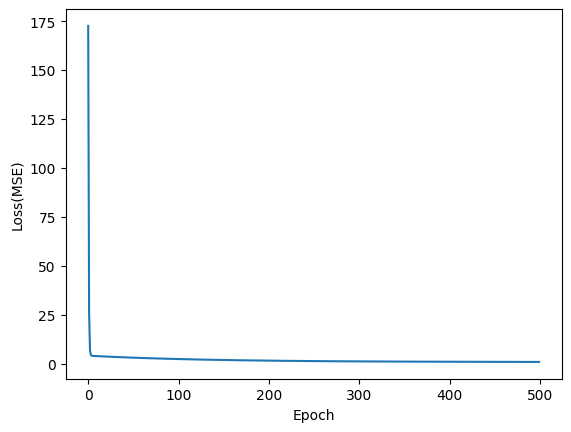

In [9]:
# epoch 별 손실을 출력합니다.
plt.plot(losses)
plt.gca().set_ylabel('Loss(MSE)')
plt.gca().set_xlabel('Epoch')
plt.show()

In [10]:
beta_hat_grad, beta_hat

(array([-0.23565149,  0.0381465 ]), array([4.54658049, 1.07400397]))

### 학습율 (Learning Rate)

경사 하강법의 안정적이고 효율적인 동작을 위해서는 적절한 학습율이 필요합니다.

- 학습율이 너무 크면 모수가 수렴하지 않고 발산합니다.


- 학습율이 너무 작으면 모수가 수렴하기까지 많은 업데이트가 요구됩니다.


**[Ex.2]**

학습율(Learning rate)를 아래와 같이 달리하면서, epoch 에 따라 손실(Loss)의 변화를 살펴 봅니다.

```
    learning_rates = [0.04, 0.01, 0.001]
```

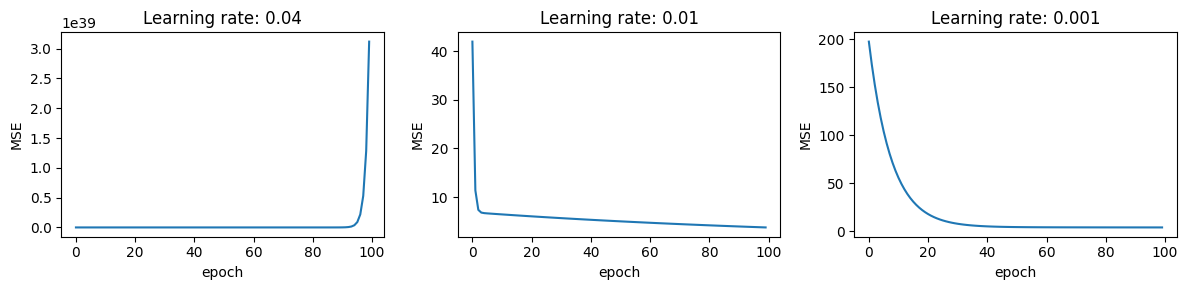

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
epochs = 100 # 파라메터 업데이트 루틴의 반복 횟수입니다.
learning_rates =[0.04, 0.01, 0.001] # 파라메터 업데이트 비율입니다. 
n = X_add_const.shape[0]

for learning_rate, ax in zip(learning_rates, axes):
    losses = list()
    beta_hat = np.random.uniform(-1, 1, size=2)
    for i in range(epochs):
        residuals = y - np.dot(X_add_const, beta_hat)
        losses.append(np.mean(residuals ** 2))
        beta_hat_grad = -2 * np.dot(X_add_const.T, residuals) / n
        beta_hat -= beta_hat_grad * learning_rate
    ax.plot(losses)
    ax.set_title('Learning rate: {}'.format(learning_rate))
    ax.set_xlabel('epoch')
    ax.set_ylabel('MSE')
plt.tight_layout()
plt.show()

### 연속형 변수의 스케일 균일화

다변수 모델에서 변수마다 스케일이 제각각이라면 적합한 변수 별로 학습율 또한 편차가 큽니다.

**경사하강법**이 보다 빠르고 안정적으로 결과를 내려면, 입력 변수 간의 스케일이 고르게 되어 있어야 합니다.

- 연속형 입력 변수들을 표준화나 정규화를 통한 균일화 합니다.

**[Ex.3]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_berry 에서 대상 변수를 yield, 입력 변수를 seeds, fruitset, fruitmass로 합니다.

입력 변수의 스케일을 확인하고, 표준화 유무에 따른 경사하강법의 진행 양상을 살펴봅니다.
    
</div>

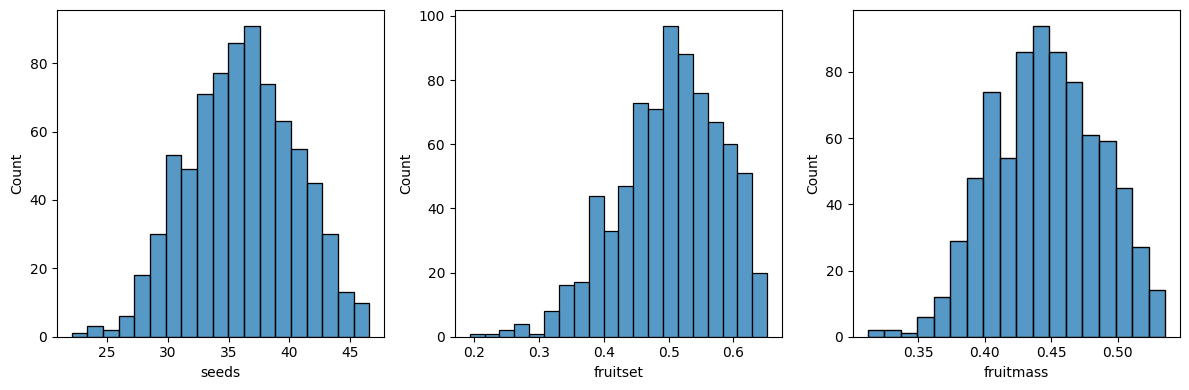

In [12]:
# 히스토그램을  이용하여 seeds, fruitset, fruitmass의 분포 확인
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
X_cols = ['seeds', 'fruitset', 'fruitmass']
for i, ax in zip(X_cols, axes):
    sns.histplot(data=df_berry, x=i, ax=ax)
plt.tight_layout()
plt.show()

In [13]:
# 별도로 절편을 계산하지 않고, 상수항을 포함시켜 절편을 계산합니다.
X_berry_const = df_berry[X_cols].assign(
    const = 1
).values
X_berry_const[:5]

array([[31.67889844,  0.41065206,  0.40815901,  1.        ],
       [33.44938499,  0.44425436,  0.42545764,  1.        ],
       [30.54630597,  0.38378651,  0.3991724 ,  1.        ],
       [31.56258602,  0.40756415,  0.40878935,  1.        ],
       [28.87371362,  0.35441305,  0.38270285,  1.        ]])

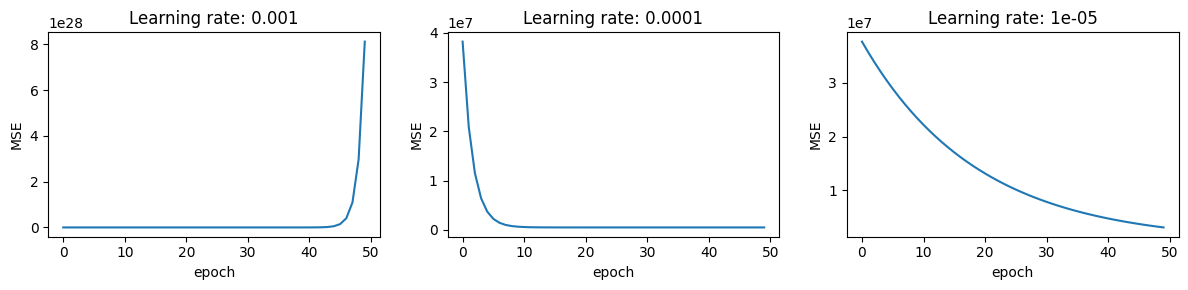

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
epochs = 50
learning_rate = 1e-5 # 파라메터 업데이트 비율입니다. 
n = X_berry_const.shape[0]

learning_rates = [1e-3, 1e-4, 1e-5]
for learning_rate, ax in zip(learning_rates, axes):
    losses = list()
    beta_hat = np.random.uniform(-1, 1, size=len(X_cols) + 1)
    for i in range(epochs):
        residuals = df_berry['yield'] - np.dot(X_berry_const, beta_hat)
        losses.append(np.mean(residuals ** 2))
        beta_hat_grad = -2 * np.dot(X_berry_const.T, residuals) / n
        beta_hat -= beta_hat_grad * learning_rate
    ax.plot(losses)
    ax.set_title('Learning rate: {}'.format(learning_rate))
    ax.set_xlabel('epoch')
    ax.set_ylabel('MSE')
plt.tight_layout()
plt.show()

In [15]:
# 입력 변수를 표준화 시킵니다.
X_berry_std_const = df_berry[X_cols].apply(lambda x: (x - x.mean()) / x.std()).assign(
    const = 1
).values
X_berry_std_const[:5]

array([[-1.01499449, -1.1513429 , -0.93780916,  1.        ],
       [-0.61057889, -0.72838037, -0.50891035,  1.        ],
       [-1.27370194, -1.48950797, -1.16062122,  1.        ],
       [-1.04156264, -1.19021135, -0.92218059,  1.        ],
       [-1.65575648, -1.85924081, -1.56896392,  1.        ]])

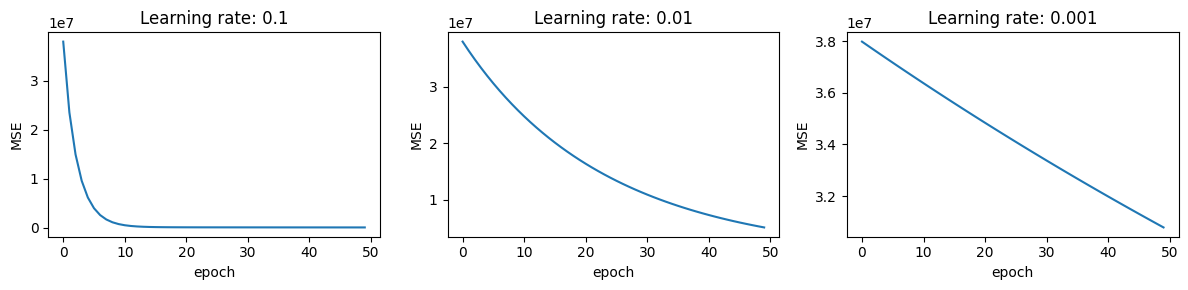

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
epochs = 50
learning_rate = 1e-5 # 파라메터 업데이트 비율입니다. 
n = X_berry_const.shape[0]

learning_rates = [1e-1, 1e-2, 1e-3]
for learning_rate, ax in zip(learning_rates, axes):
    losses = list()
    beta_hat = np.random.uniform(-1, 1, size=len(X_cols) + 1)
    for i in range(epochs):
        residuals = df_berry['yield'] - np.dot(X_berry_std_const, beta_hat)
        losses.append(np.mean(residuals ** 2))
        beta_hat_grad = -2 * np.dot(X_berry_std_const.T, residuals) / n
        beta_hat -= beta_hat_grad * learning_rate
    ax.plot(losses)
    ax.set_title('Learning rate: {}'.format(learning_rate))
    ax.set_xlabel('epoch')
    ax.set_ylabel('MSE')
plt.tight_layout()
plt.show()

### 확률적 경사 하강법(Stochastic  Gradient Descent)


학습 데이터가 고르게 분포한다면, 일부분 데이터의 경사도와 전체 데이터의 경사도가 유사합니다. 

$\frac{dL_{batch}}{d\hat{\beta}} \approx \frac{dL}{d\hat{\beta}}$

1 epoch에서 전체 데이터셋을 일부분씩 나누어 경사를 구하고 업데이트하여, 경사도 계산 시간과 메모리를 줄여 효율적으로 경사하강법을 수행합니다.


- 전체에서 경사(Gradient)를 구할 때의 결과는 늘 같지만, 나누어서 경사를 구할 때는 어떻게 셋이 나뉘느냐에 따라서 결과가 달라지게 되어 확률적(Stochastic) 경사 하강법이라고 합니다. 


- 배치(Batch): 전체의 데이터셋을 작은 단위로 나뉘어진 데이터셋들을 말합니다

> 이 배치(Batch)의 크기가 1인 경우를 Stochastic Gradient Descent라고 1 보다 클 경우를 (Batch Gradient Descent)라고 구분하기도 합니다.

- 일부분의 데이터를 가지고 학습이 이루어지므로 굳이 모든 데이터를 메모리에 올릴 필요없이 배치를 만드는데 필요한 만큼만 메모리에 올리면 되므로 메모리 효율적이고, 대용량의 데이터를 학습할 수 있습니다.


- 일부의 데이터로 파라메터의 업데이트를 하므로 수렴이 상대적으로 적은 수의 반복으로 빠르게 될 가능성이 높습니다.


- 데이터의 분포가 고르지 않고 편중되어 있다면 제대로 학습이 되기 어렵습니다. 편중되지 않도록 데이터를 잘 섞어주어야 합니다.

**[Ex.4]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex. 3]에서 배치(batch)의 크기를 32로 하여 배치(Batch) 경사하강법으로 학습을 합니다.
    
</div>

In [17]:
beta_hat = np.random.uniform(-1, 1, size=len(X_cols) + 1)
beta_hat

epochs = 50
batch_size = 32
learning_rate = 5e-2 # 파라메터 업데이트 비율입니다. 
n = len(df_berry)
losses = list()
for i in range(epochs):
    for j in range(0, n, batch_size):
        X_batch = X_berry_std_const[j:j+batch_size]
        residuals = df_berry.iloc[j:j+batch_size]['yield'] - np.dot(X_batch, beta_hat)
        beta_hat_grad = -2 * np.dot(X_batch.T, residuals) / X_batch.shape[0]
        beta_hat -= beta_hat_grad * learning_rate
    
    losses.append(np.mean((df_berry['yield'] - np.dot(X_berry_std_const, beta_hat)) ** 2))

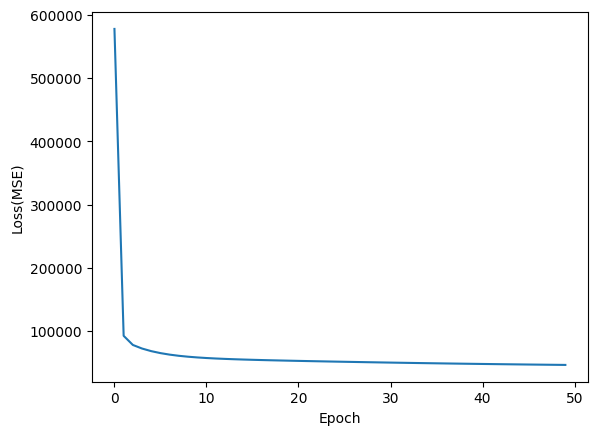

In [18]:
plt.plot(losses)
plt.gca().set_ylabel('Loss(MSE)')
plt.gca().set_xlabel('Epoch')
plt.show()

### 조기 종료(Early Stopping)

학습셋의 일부를 분리하여 매 Epoch 마다 성능을 측정하여, 이 때 성능이 개선이 없으면 학습을 종료하도록 합니다.

이를 통해 불필요한 학습 과정을 생략하고, 과도하게 학습 데이터에 맞춰지지 않도록 합니다.

**[Ex.5]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex. 4]에서 학습 데이터의 10% 만큼을 조기 종료 데이터로 만들어 조기 종료 루틴이 포함된 경사 하강법을 수행합니다.
    
</div>

In [19]:
from sklearn.model_selection import train_test_split
beta_hat = np.random.uniform(-1, 1, size=len(X_cols) + 1)
beta_hat

epochs = 1000
batch_size = 32
learning_rate = 1e-2 # 파라메터 업데이트 비율입니다. 
X_berry_std_fit, X_berry_std_es, y_berry_fit, y_berry_es = train_test_split(X_berry_std_const, df_berry['yield'], train_size=0.9)
n = X_berry_std_fit.shape[0]
losses = list()
prev_loss = np.inf
for i in range(epochs):
    for j in range(0, n, batch_size):
        X_batch = X_berry_std_fit[j:j+batch_size]
        residuals = y_berry_fit[j:j+batch_size] - np.dot(X_batch, beta_hat)
        beta_hat_grad = -2 * np.dot(X_batch.T, residuals) / X_batch.shape[0]
        beta_hat -= beta_hat_grad * learning_rate
    es_loss = np.mean((y_berry_es - np.dot(X_berry_std_es, beta_hat)) ** 2)
    if prev_loss < es_loss:
        print('Early Stopped: {}, {}, {}'.format(i + 1, prev_loss, es_loss))
        break
    prev_loss = es_loss
    losses.append(np.mean((y_berry_fit - np.dot(X_berry_std_fit, beta_hat)) ** 2)) 

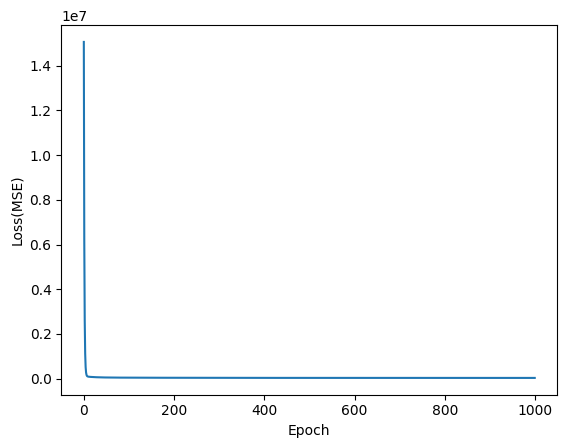

In [20]:
plt.plot(losses)
plt.gca().set_ylabel('Loss(MSE)')
plt.gca().set_xlabel('Epoch')
plt.show()

**학습률 스캐쥴링**

학습률을 진행상황에 따라 조정합니다. 학습이 진행이 될 수록 학습률을 줄여 보다 안정적으로 파라메터를 수렴시키도록 하고, 또한 보다 세밀하게 파라메터의 최적공간을 탐색하도록합니다.

지수 감소(Exponential Decay): $\text{learing_rate(학습률)} = \text{Initial learning rate(초기 학습률)}×\text{감소율}^{t}$

$t$: epoch 수


**[Ex.6]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex. 4]에서 학습률 스캐쥴링을 추가하고, 학습율 감소율을 0.98로 설정하여 학습을 해봅니다.
    
</div>

In [21]:
from sklearn.model_selection import train_test_split
beta_hat = np.random.uniform(-1, 1, size=len(X_cols) + 1)
beta_hat

epochs = 50
batch_size = 32
learning_rate_init = 1e-2 # 파라메터 업데이트 비율입니다. 
rate = 0.95
X_berry_std_fit, X_berry_std_es, y_berry_fit, y_berry_es = train_test_split(X_berry_std_const, df_berry['yield'], train_size=0.9)
n = X_berry_std_fit.shape[0]
losses = list()
learning_rates = list()
prev_loss = np.inf
for i in range(epochs):
    learning_rate= learning_rate_init * rate ** i
    learning_rates.append(learning_rate)
    for j in range(0, n, batch_size):
        X_batch = X_berry_std_fit[j:j+batch_size]
        residuals = y_berry_fit[j:j+batch_size] - np.dot(X_batch, beta_hat)
        beta_hat_grad = -2 * np.dot(X_batch.T, residuals) / X_batch.shape[0]
        beta_hat -= beta_hat_grad * learning_rate
    es_loss = np.mean((y_berry_es - np.dot(X_berry_std_es, beta_hat)) ** 2)
    if prev_loss < es_loss:
        print('Early Stopped: {}, {}, {}'.format(i + 1, prev_loss, es_loss))
        break
    prev_loss = es_loss
    losses.append(np.mean((y_berry_fit - np.dot(X_berry_std_fit, beta_hat)) ** 2)) 

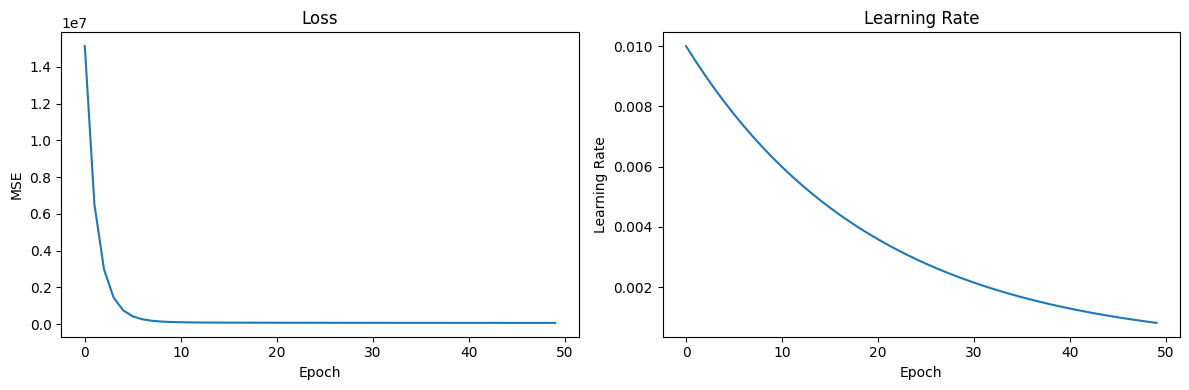

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(losses)
axes[0].set_ylabel('MSE')
axes[0].set_xlabel('Epoch')
axes[0].set_title("Loss")
axes[1].plot(learning_rates)
axes[1].set_ylabel('Learning Rate')
axes[1].set_xlabel('Epoch')
axes[1].set_title("Learning Rate")
plt.tight_layout()
plt.show()

## 2. EM 알고리즘(Expectation Maximization)

EM 알고리즘은 미지의 변수(latent variables)를 포함하고 있는 통계 모델의 모수를 구하는 알고리즘입니다.


### 상세 배경

1. 확률 모델은 $X$: 관측 데이터, $Z$: 미지의 변수, $\theta$: 모수 벡터와 우도 함수 $L(\theta; X, Z) = p(X, Z|\theta)$ 로 구성됩니다. 


2. 최대우도추정를 통한 모수의 추정은 관측데이터의 주변 우도를 최대화하는 수를 모수로 추정하는 것입니다.


1. 2를 공식화하면 아래와 같습니다.

<div style="border: 0px; margin-top: 10px; margin-left: 20px">

$\theta=argmax_\theta L(\theta;X)$ 

$L(\theta;X) = p(X|\theta) = \int p(X,Z|\theta)dZ = \int p(X|Z,\theta)p(Z|\theta)dZ$

</div>
    
하지만, $Z$는 미지의 변수이기 때문에, $\theta$를 알기전에는 $Z$의 분포를 알 수 없습니다. 

아래의 코드는 두 개의 정규 분포에서 생성한 표본입니다.

$N(-10, 9)$ 에서 300개의 표본, $N(10, 4)$에서 550개

이 표본들의 모수를 모르고 또한 표본들이 속한 모집단을 모르는 상태에서

두 모집단의 모수를 추정해야 하는 상황을 생각해봅니다.

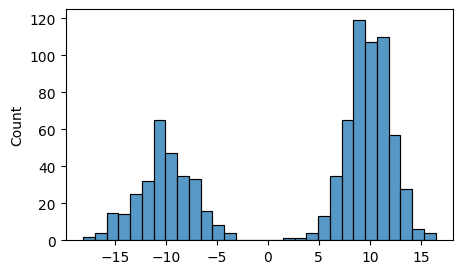

In [23]:
from scipy.stats import norm

plt.figure(figsize=(5, 3))
x1 = norm.rvs(loc = -10, scale=3, size=300)
x2 = norm.rvs(loc = 10, scale=2, size=550)
X = np.hstack([x1, x2])
sns.histplot(X, bins=30)
plt.show()

x는 두 개의 정규 분포가 섞여 있는 분포 입니다. 

두 개의 정규 분포의 모수인 평균과 분산을 추정하기 위해서는

각 표본들이 어떤 분포에 속한지 알아야 합니다. 

하지만 모수를 알 지 못한다면, 표본이 어떤 분포에 속하는지를 알 수 없는 상황이 됩니다.

그렇기 때문에 평균과 분산을 추정하기도 어려워집니다.

### Expectation Maximization(EM) 알고리즘

#### 아이디어

일단, $\theta$ 임의의 수로 정의한후 Z(미지의 변수, latent variables)를 구합니다.

$Z$와 $X$를 가장 잘 설명하는(최대 우도를 갖는) $\theta$를 구하고, 이 $\theta$로 다시 Z를 구하는 일련의 과정을 반복합니다.

#### 알고리즘

1. $\theta$를 초기화 합니다.


2. 기대값 단계(Expectation, E step) 

<div style="border: 0px; margin-top: 10px; margin-left: 20px">

$Q(\theta'|\theta)$: 현재 단계 모수 $\theta$에서 다음 단계 모수 $\theta'$에 대한  로그 우도 $log(p(X, Z| \theta'))$의 기대값입니다.

> $Q(\theta'|\theta) = E_{Z \sim p( \cdot|X, \theta)}\left[log P(X, Z | \theta') \right]$ 
    
</div>

3. 최대화 단계(Maximization, M step)

<div style="border: 0px; margin-top: 10px; margin-left: 20px">

$\theta' = argmax_{\theta'} Q(\theta' | \theta)$

</div>
    
4. $\theta = \theta'$ 로 업데이트하고 수렴할 때까지 2부터 반복합니다. 

**[Ex.7]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

위에서 생성한 표본을 생성한 분포의 모수를 EM 알고리즘으로 구하기 위해 $Q(\theta'|\theta)$와 $Q(\theta'|\theta)$를 최대화하는 $\theta'$을 구해봅니다.
    
</div>

$Q(\theta|\theta')$을 구하기 위해 먼저 $Z \sim p(\cdot | X, \theta)$ 를 구해 봅니다.

**기대값(Expectation) 단계**

$T_{j,i} = P(Z_i = j | X_i = x_i; \theta)$

<div style="border: 0px; margin-top: 10px; margin-left: 20px">

$T_{j,i} = \frac{P(X_i = x_i | Z_i = j; \theta) P(Z=j)}{P(X_i=x_i; \theta)}$

$T_{j,i} = \frac{P(X_i = x_i | Z_i = j; \theta) P(Z=j)}{\sum_{k = 1}^CP(X_i = x_i | Z_i = k; \theta) P(Z = k)}$

> $X_i | Z_i = 1 \sim N(\mu_1, \sigma_1^2)$, ... , $X_i | Z_i = C \sim N(\mu_c, \sigma_c^2)$
>
> $P(Z = 1) = \tau_1$, ... ,$P(Z = C) = \tau_c$
    
</div>

X의 분포와 Z의 분포를 정의하기 위해 필요한 모수는  $\theta = (\mu, \sigma, \tau)$ 입니다.

$Q(\theta|\theta') = \sum_{i=1}^n \sum_{j=1}^C T_{ji} \left( logP(X_i=x_i, Z_i = j| \theta) \right)$

<div style="border: 0px; margin-top: 10px; margin-left: 20px">

$logP(X_i=x_i, Z_i = j| \theta) = log(P(X_i=x_i|Z_i = j; \theta) + log P(Z=j; \theta)$

$ = log(\frac{1}{\sqrt{2\pi}\sigma_j}) - \frac{1}{2}\left(\frac{x_i - \mu_j}{\sigma_j}\right)^2 + log \tau_j$

</div>

**최대화(Maximization) 단계**

$Q(\theta|\theta') = \sum_{i=1}^n \sum_{j=1}^C T_{j,i} \left( log(\frac{1}{\sqrt{2\pi}\sigma_j}) - \frac{1}{2}\left(\frac{x_i - \mu_j}{\sigma_j}\right)^2 + log \tau_j \right)$

$\tau' = argmax_\tau \sum_{i=1}^n \sum_{j=1}^C T_{j,i}log\tau_j$

> $\tau' = \frac{1}{n}\sum_{i=1}^n T_{ji}$
    
$(\mu', \sigma') = argmax_{\mu, \sigma} \sum_{i=1}^n \sum_{j=1}^C T_{j,i} \left( -log(\sigma_j) - \frac{1}{2}\left(\frac{x_i - \mu_j}{\sigma_j}\right)^2 \right)$

>$\mu' = \frac{\sum_{i=1}^nT_{j,i}x_i}{\sum_{i=1}^n T_{j,i}}$, 
>
>$\sigma'^2 = \frac{\sum_{i=1}^nT_{j,i}(x_i - \mu_j)^2}{\sum_{i=1}^n T_{j,i}}$
    


**[Ex.8]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex.7]에서 도출한 내용들로 두 개의 정규 분포의 모수를 EM 알고리즘을 통해 점추정해봅니다.
    
</div>

In [24]:
# 모수를 초기화 합니다.

n_mixture = 2
n = X.shape[0]

mu = np.random.uniform(size=n_mixture)
mu = mu - mu.mean() + X.mean()

sigma = np.ones(n_mixture)
tau = np.ones(n_mixture) / n_mixture

In [25]:
from scipy.stats import norm

# Expectation 관계
# T_ij: 각 데이터 포인트가 속하는 분포의 확률을 구합니다.
T = np.vstack([norm.pdf(X, loc = mu[i], scale = sigma[i]) for i in range(n_mixture)]).T
T = T / np.sum(T, axis=1, keepdims=True)

In [26]:
# Maximiztion 단계 1: tau
# tau_prime을 구합니다.
T_sum = T.sum(axis=0)
tau_prime = T_sum / n
tau_prime

array([0.57395248, 0.42604752])

In [27]:
# Maxmization 단계2: mu, sigma
T = T / T_sum
mu_prime = np.array([np.dot(T[:, i], X) for i in range(n_mixture)]) 
sigma_prime = np.array([np.dot(T[:, i], np.square(X- mu_prime[i])) ** 0.5 for i in range(n_mixture)])

mu_prime, sigma_prime

(array([ 9.73908814, -6.42604572]), array([3.22508186, 8.01448743]))

**[Ex.9]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex.8]를 기반으로 EM 알고리즘의 업데이트 과정을 initiial, 3, 6, 9 번 했을 때의 학습 진행 과정을 시각화해봅니다.
    
</div>

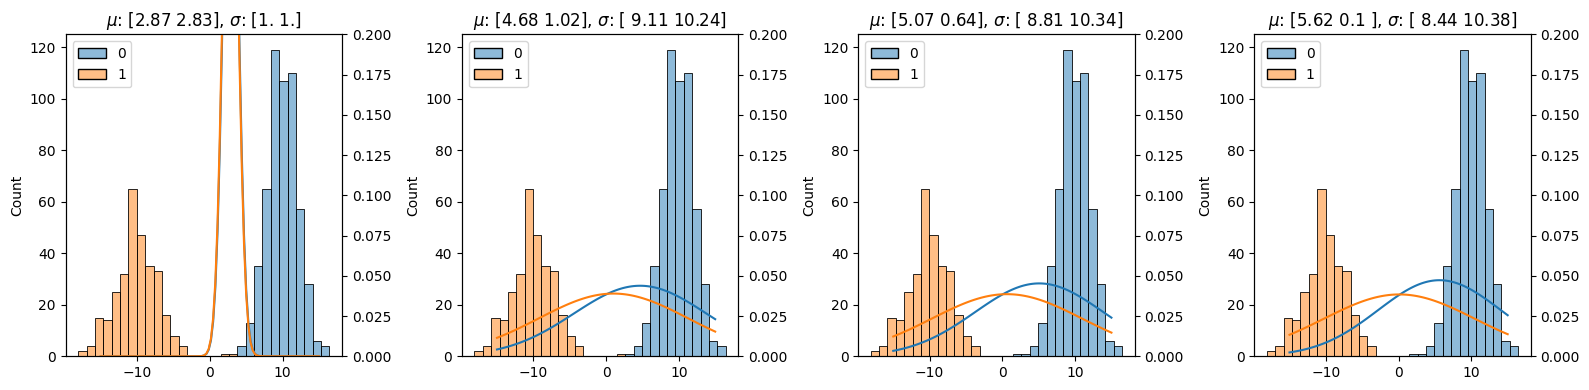

In [28]:
from scipy.stats import norm

def plot_dist(ax, X, mu, sigma, T):
    x_range = np.linspace(-15, 15, 100)
    sns.histplot(x=X, hue=np.argmax(T, axis=1), bins=30, ax=ax)
    ax.set_title('$\mu$: {}, $\sigma$: {}'.format(np.round(mu, 2), np.round(sigma, 2)))
    tax = ax.twinx()
    tax.set_ylim(0, 0.2)
    for i in range(mu.shape[0]):
        tax.plot(x_range, norm.pdf(x_range, loc=mu[i], scale=sigma[i]))

# 모수를 초기화 합니다.
n_mixture = 2
n = X.shape[0]

mu = np.random.uniform(-1, 1, size=n_mixture)
mu = mu - mu.mean() + X.mean()

sigma = np.ones(n_mixture)
tau = np.ones(n_mixture) / n_mixture

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

plot_dist(axes[0], X, mu, sigma, T)
for ax in axes[1:]:
    T = np.vstack([norm.pdf(X, loc = mu[i], scale = sigma[i]) for i in range(n_mixture)]).T
    T = T / np.sum(T, axis=1, keepdims=True)
    T_sum = T.sum(axis=0)
    tau_prime = T_sum / n
    T = T / T_sum
    mu_prime = np.array([np.dot(T[:, i], X) for i in range(n_mixture)]) 
    sigma_prime = np.array([np.dot(T[:, i], np.square(X- mu_prime[i])) ** 0.5 for i in range(n_mixture)])
    tau, mu, sigma = tau_prime, mu_prime, sigma_prime
    plot_dist(ax, X, mu, sigma, T)

plt.tight_layout()
plt.show()

## 3. MCMC(Markov Chain Monte Carlo)

MCMC는 확률적 표본추출 기법 중의 하나로, 목표 분포에서 표본을 추출합니다. 

마르코프 체인에서의 이전 상태와의 독립성과 Monte Carlo의 무작위 시도를 통한 산출 방법을 응용하여 복잡한 확률 분포의 표본을 추출하는 방법들을 포괄적으로 일컫습니다.

통계와 머신러닝에서는 모수를 샘플링하는 것에 많이 쓰입니다. 

MCMC의 알고리즘의 한 예로 메트로폴리스-헤이스팅스 알고리즘(Metropolis-Hastings) 이 있습니다.

메트로폴리스-헤이스팅스 알고리즘은 주어진 모수의 사전(Prior) 분포에서 관측 데이터에 대한 모수의 사후(Posterior)의 분포에서 모수를 추출하여,

사후 분포 상의 모수를 추정하는 것에 사용합니다.


### 몬테 카를로 측정(Monte Carlo Estimation)

- 무작위 시도의 반복을 통하여 대상값을 도출합니다.


- 특히 해석적으로 풀이가 거의 불가능한 문제의 값을 구합니다.

**[Ex.10]** 

반지름 1인 원의 넓이를 Monte Carlo 방법을 통해 구해봅니다.

반지름이 1인 원의 넓이: $\pi = 3.141592653589793 ... $

2×2 정사각형에 임의의 점을 찍을 때 원 안에 위치할 확률을 p라고 하면

$\text{원의 넓이} \approx p \cdot 4\text{(2×2 정사각형 넓이)}$

In [29]:
cnt = 0
n_trial = 10000

x = np.random.uniform(-1, 1, size=n_trial)
y = np.random.uniform(-1, 1, size=n_trial)
is_in_circle = np.sqrt(x ** 2 + y ** 2) <= 1

p = is_in_circle.sum() / n_trial
p * 4

3.1616

### 마르코프 체인(Markov Chain)

시간이나 공간의 흐름에 따라 특정 상태(state)로의 전이를 모델링하는 수학적 도루입니다. 이는 확률적인 시스템의 행동을 분석하고 예측하는 곳에 사용됩니다.

시점(또는 지점)마다 상태를 가지고 있고, 각 상태는 일정한 확률로 전이될 수 있습니다.

- 상태 공간(State Space): 시스템이 취할 수 있는 가능한 모든 상태들을 나타냅니다.


- 전이 확률(Transition Probability): 한 상태에서 다른 상태로 전이될 확률을 나타냅니다. 

> 전이 확률 행렬: 전이 확률을 요소로 담고 있는 행렬입니다.
>
> $P = \begin{bmatrix}
P_{11} & P_{12} & \cdots & P_{1n} \\
P_{21} & P_{22} & \cdots & P_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
P_{n1} & P_{n2} & \cdots & P_{nn}
\end{bmatrix}$,  $P_{ij}$: i 상태에서 j 상태로 전이될 확률입니다.
>
> 임의의 j에 대해서 $\sum_{i=1}^n P_{ji} = 1$ 입니다.
>
> 상태 확률을 행벡터 v라고 하면, 다음 상태 확률을 v'라고 하면 $v' = v P$

- 마르코프 속성(Markov Property): 다음 상태로 전이는 오직 현재 상태하고만 연관이 있습니다. 메모리리스(memoryless)


**[Ex.11]**

상태 공간은 {E, A} 입니다. 아래 다이어그램은 E와 A사이의 전이 확률을 나타냅니다.

현재 E 상태일 확률은 0.7, A 상태일 확률이 0.3 일 때, 1에서 20단계가 지나후의 E 상태일 때와 A 상태일 확률을 구하여 그래프로 출력해봅니다.


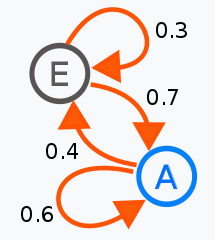

※ 이미지 출처: https://en.wikipedia.org/wiki/Markov_chain

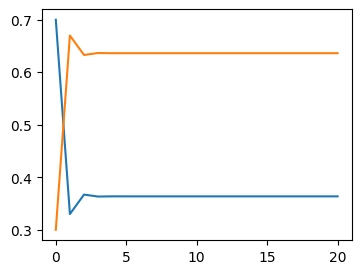

In [30]:
# 초기 확률입니다.
v = np.array([0.7, 0.3])
# 전이 확률 행렬입니다.
P = np.array([[0.3, 0.7], [0.4, 0.6]])
v_list = [v]
for _ in range(20):
    v_list.append(np.dot(v_list[-1], P))

v_list = np.vstack(v_list)
plt.figure(figsize=(4, 3))
plt.plot(v_list[:, 0])
plt.plot(v_list[:, 1])
plt.show()

**[Ex. 12]**

상태 공간은 {A, B} 입니다. A에서 B로 이동할 확률은 1.0이고, B에서 A로 이동할 확률은 1.0입니다.

현재 A 상태일 확률은 0.7, B 상태일 확률이 0.3 일 때, 1에서 20단계가 지나후의 A 상태일 때와 B 상태일 확률을 구하여 그래프로 출력해봅니다.

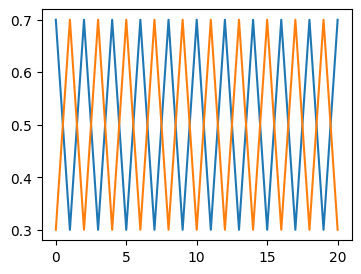

In [31]:
# 초기 확률입니다.
v = np.array([0.7, 0.3])
P = np.array([[0.0, 1.0], [1.0, 0]])
v_list = [v]
for _ in range(20):
    v_list.append(np.dot(v_list[-1], P))

v_list = np.vstack(v_list)
plt.figure(figsize=(4, 3))
plt.plot(v_list[:, 0])
plt.plot(v_list[:, 1])
plt.show()

### 메트로폴리스-헤이스팅스(Metropolis-Hastings) 알고리즘

MCMC 알고리즘에서 가장 기본적이면서 널리 사용되는 알고리즘 중 하나입니다.

목표 분포 f(\theta)로부터 표본을 추출합니다.


#### 알고리즘

i번째의 표본을 $\theta_i$라 정의합니다.

1. 시작 상태 설정: 상태 공간에 임의의 상태로 시작 합니다.($\theta_0$ 추출)


2. 표본 제안(Sample Proposal): 현재 상태에서 새로운 상태를 제안합니다 $\theta_{t + 1}$를 제안 받습니다.


3. 수용 확률(Acceptance Probability): 제안한 상태($\theta_{t + 1}$}와 현재 상태($\theta_{t}$)의 목표 분포를 구합니다. 

> 다음 표본이 수용될 확률을 현재 상태만을 고려하여 구한다는 점이 Markov Chain을 이용한 점입니다.
>
> $\alpha = \frac{f(\theta_{t + 1})}{f(\theta_t)}$
>
> $\alpha \ge 1$ 이면 무조건 수용
>
> $\alpha \lt 1$ 이면 몬테 카를로 기법을 응용하여 [0, 1] 사이의 난수를 생성하여 이 숫자가 $\alpha$ 보다 작으면 수용

4. 현재 수용된 표본을 취하고, 목표한 표본을 얻을 때까지 2를 반복합니다.

####  모수의 사후 분포에서 모수 추출 

<div style="border: 0px solid #ddd; padding: 12px; margin-top: 10px;">

모수의 사전(Prior) 분포와 관측 데이터에서 모수의 사후(Posterior) 분포에서 모수를 추출합니다.

즉, 사전에 알고 있는 모수에 대한 지식을 바탕으로 관측 데이터를 통해 얻어지는 모수의 분포를 추정해봅니다.

베이즈 규칙을 이용하여 사전 분포와 사후 분포의 관계를 식으로 나타내면 아래와 같습니다.

> $p(\theta' | X, \theta) = \frac{P(X=x_{1}, ... X=x_{n}|\theta) P(\theta)}{P(X=x_{1}, ... X=x_{n})}$


$P(X=x_{1}, ... X=x_{n})$를 구하는 것은 굉장히 어려운 일이기 때문에, 모수의 사후 확률 분포를 직접 계산하는 것 또한 어렵습니다.

메트로폴리스-헤이스팅스를 적용하면, 모수의 사후 분포 모수를 추출할 수 있습니다.


아래 메트로폴리스-헤이스팅스의 수용확률에 사후 확률 분포를 적용을 하면,

> $\alpha = \frac{f(\theta_{t + 1})}{f(\theta_t)}$

이전 상태의 확률이나 이후 제안의 증거 확률은 $P(X=x_{1}, ... X=x_{n})$으로 동일하기 때문에 

> $\alpha = \frac{P(X=x_{1}, ... X=x_{n}|\theta') P(\theta')}{P(X=x_{1}, ... X=x_{n}|\theta) P(\theta)}$

로 나타내어 증거확률을 계산할 필요가 없게 됩니다.


이러한 원리로 사후 확률 계산에서의 난제인 증거 확률 계산 문제를 해소할 수 있습니다.
    
</div>


**[Ex.13]** 

아래  표본들은 정규분포에서 추출된 표본입니다. 이 표본들을 X라고 합니다. 각 표본들은 독립입니다

```
X = [2.83, 6.99, 5.57, 1.99, 3.84, 8.3 , 0.15, 4.14, 7.53, 3.27, 
    3.64, 4.81, 7.98, 3.72, 4.11, 4.13, 9.41, 9.37, 7.01, 5.77]
```

이 정규분포의 평균 ($\mu$)의 사전(Prior) 분포는 N(3, 4)이고 분산($\sigma^2$)의 사전 분포는 N(5, 2)입니다.


목표 분포 함수는 아래와 같이 유도됩니다.

> $p(\mu', \sigma' | X, \mu, \sigma) \propto P(X=x_{1}, ... X=x_{n}|\mu, \sigma) P(\mu, \sigma) = \prod_{i=1}^{n}  P(X=x_i|\mu, \sigma) P(\mu, \sigma)$


사후 확률 분포의 모수 $\mu', \sigma'$를 추정하기 위해,

$\mu', \sigma'$을 메트로폴리스-헤이스팅스 알고리즘을 사용하여 5000개 추출해봅니다.

표본의 제안 방법은 아래와 같습니다.

> $\mu_{t+1} \sim N(\mu_t, 1)$
>
> $\sigma_{t+1} \sim Chi^2(1) × (\sigma_{t})$


수집한 10000개에서 표본 분포의 수렴점과 자기 상관성을 시각화를 통해 확인하여, 유효한 표본을 선택해봅니다.

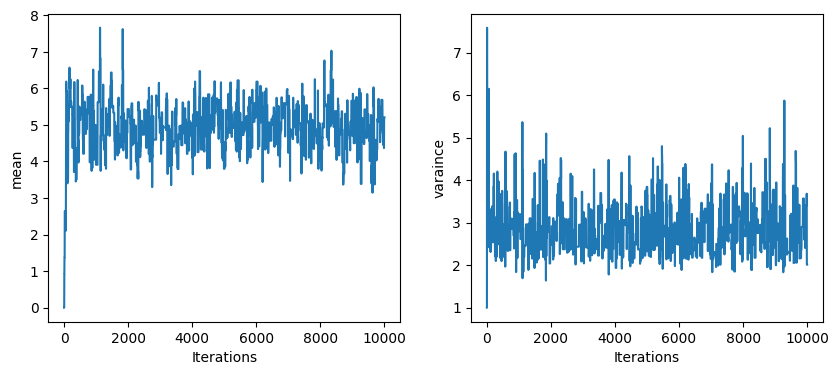

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

X = [
    2.83, 6.99, 5.57, 1.99, 3.84, 8.3 , 0.15, 4.14, 7.53, 3.27, 
    3.64, 4.81, 7.98, 3.72, 4.11, 4.13, 9.41, 9.37, 7.01, 5.77
]
prior_mean_mu, prior_mean_sigma = 3, 4
prior_var_mu, prior_var_sigma = 5, 2
# log에 0이 입력되는 것을 차단하기 위해 임의의 작은 수를 정의합니다.
eps = 1e-7

# 목표 분포를 정의합니다.
# 계산 시 overflow를 예방하기 위해 log 확률을 사용하여 likelihood 계산합니다.
def target_log_distribution(x):
    # 로그 우도르 계산합니다.
    log_likelihood = np.sum(np.log(norm.pdf(X, loc=x[0], scale=x[1]) + eps))
    # 사전 확률을 정규분포를 따르므로 이 
    prior = np.log(norm.pdf(x[0], loc=prior_mean_mu, scale=prior_mean_sigma ** 0.5) + eps) + \
            np.log(norm.pdf(x[1], loc=prior_var_mu, scale=prior_var_sigma ** 0.5) + eps)
    return log_likelihood + prior

# 제안 분포로서 다변수 정규분포를 사용
def proposal_distribution(x):
    return norm.rvs(x[0]), chi2.rvs(df=1) * x[1]

# 수용 확률 계산
def acceptance_probability(x_new, x_current):
    # 로그확률을 사용하기 때문의 비율 연산이 - 연산이 되었습니다. 
    # 이를 다시 일반 확률로 돌리기 위해 exp 함수를 적용합니다.
    return min(1, np.exp(target_log_distribution(x_new) - target_log_distribution(x_current)))

# Metropolis-Hastings 알고리즘
def metropolis_hastings(iterations):
    samples = []
    x_current = [0, 1]  # 초기값 설정

    for _ in range(iterations):
        x_new = proposal_distribution(x_current)  # 새로운 제안 생성
        alpha = acceptance_probability(x_new, x_current)
        u = np.random.uniform(0, 1)

        if u < alpha:  # 수용 여부 결정
            x_current = x_new

        samples.append(x_current)  # 샘플 저장

    return np.vstack(samples)


# Metropolis-Hastings 알고리즘 실행
X_sample = metropolis_hastings(10000)

# 결과 시각화
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for i, (ax, val) in enumerate(zip(axes, ['mean', 'varaince'])):
    ax.plot(np.arange(len(X_sample)) + 1, X_sample[:, i])
    ax.set_xlabel('Iterations')
    ax.set_ylabel(val)

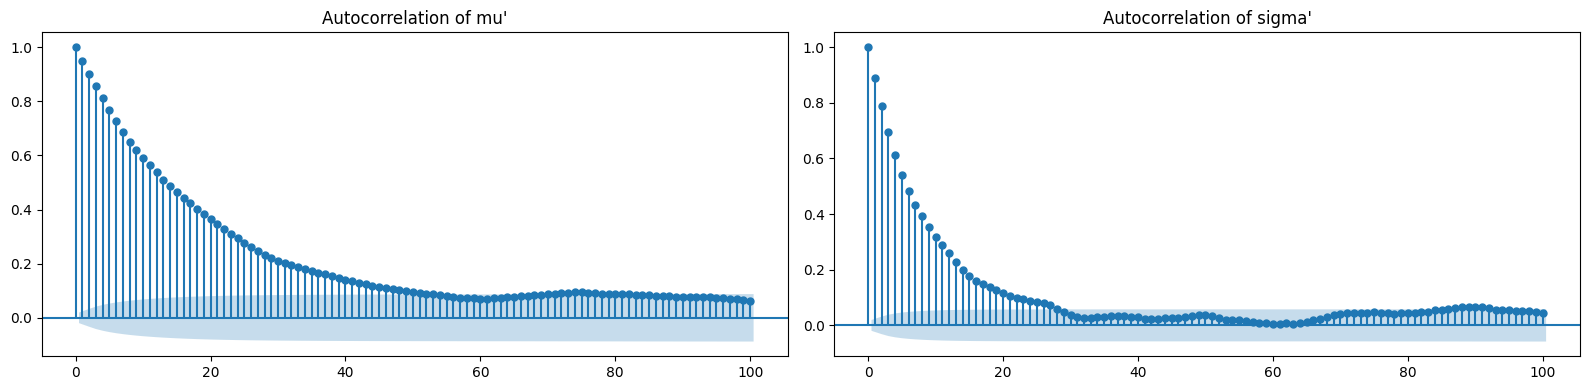

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(X_sample[:, 0], lags=100, ax=axes[0])
axes[0].set_title("Autocorrelation of mu'")
plot_acf(X_sample[:, 1], lags=100, ax=axes[1])
axes[1].set_title("Autocorrelation of sigma'")

plt.tight_layout()
plt.show()

In [34]:
X_samples_selected = X_sample[300::50]

Estimated Mean: 4.96041905900934
Estimated Standard Deviation: 2.8866689784050785


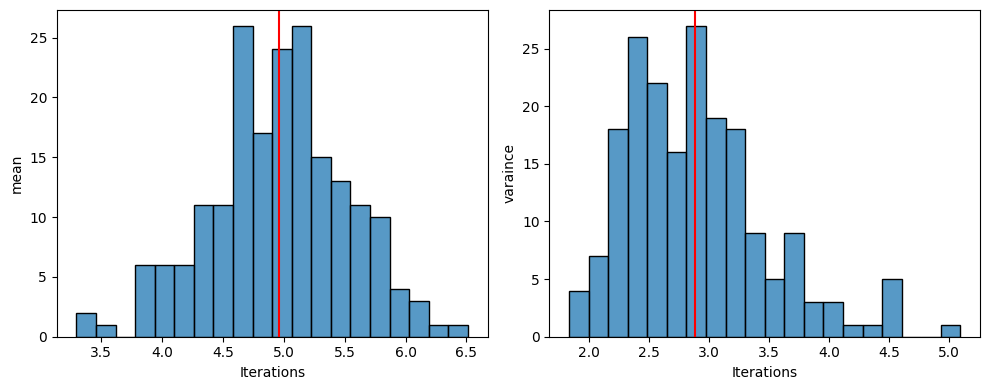

In [35]:
# 추정된 평균과 표준편차
estimated_mean = np.mean(X_samples_selected, axis=0)[0]
estimated_std = np.mean(X_samples_selected, axis=0)[1]
print("Estimated Mean:", estimated_mean)
print("Estimated Standard Deviation:", estimated_std)

# 결과 시각화
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for i, (ax, val) in enumerate(zip(axes, ['mean', 'varaince'])):
    sns.histplot(X_samples_selected[:, i], ax=ax, bins=20)
    ax.set_xlabel('Iterations')
    ax.set_ylabel(val)
axes[0].axvline(estimated_mean, color='red')
axes[1].axvline(estimated_std, color='red')

plt.tight_layout()
plt.show()

```
mu, var = 5, 2
np.random.seed(123)
data = np.random.normal(mu, var, 20)
```